In [20]:
import pandas
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
print(dataset.shape)

(150, 5)


In [4]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  peta-width        class
0            5.1          3.5           1.4         0.2  Iris-setosa
1            4.9          3.0           1.4         0.2  Iris-setosa
2            4.7          3.2           1.3         0.2  Iris-setosa
3            4.6          3.1           1.5         0.2  Iris-setosa
4            5.0          3.6           1.4         0.2  Iris-setosa
5            5.4          3.9           1.7         0.4  Iris-setosa
6            4.6          3.4           1.4         0.3  Iris-setosa
7            5.0          3.4           1.5         0.2  Iris-setosa
8            4.4          2.9           1.4         0.2  Iris-setosa
9            4.9          3.1           1.5         0.1  Iris-setosa
10           5.4          3.7           1.5         0.2  Iris-setosa
11           4.8          3.4           1.6         0.2  Iris-setosa
12           4.8          3.0           1.4         0.1  Iris-setosa
13           4.3          3.0     

In [5]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  peta-width
count    150.000000   150.000000    150.000000  150.000000
mean       5.843333     3.054000      3.758667    1.198667
std        0.828066     0.433594      1.764420    0.763161
min        4.300000     2.000000      1.000000    0.100000
25%        5.100000     2.800000      1.600000    0.300000
50%        5.800000     3.000000      4.350000    1.300000
75%        6.400000     3.300000      5.100000    1.800000
max        7.900000     4.400000      6.900000    2.500000


In [6]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


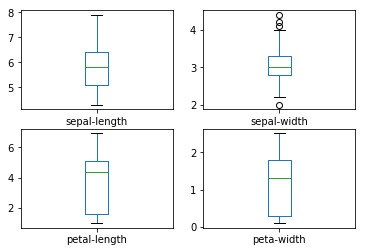

In [7]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

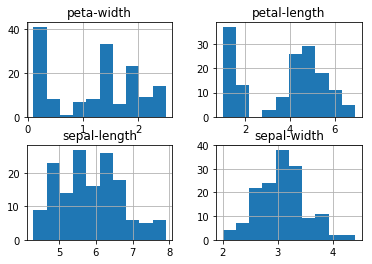

In [8]:
dataset.hist()
plt.show()

In [16]:
#Split-out validation dataset
array = dataset.values
x = array[:, 0:4]
y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size = validation_size, random_state=seed)

In [17]:
seed = 7
scoring = 'accuracy'

In [23]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
print(models)

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('CART', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                   

In [24]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


C:\Users\DOMINIC\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DOMINIC\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DOMINIC\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DOMINIC\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DOMINIC\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarn

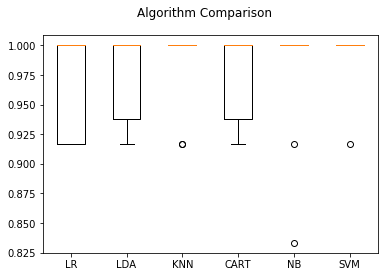

In [29]:
#Compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()